How to run a PCA analysis in R
==============================

You can do PCA in one step in R, using its ``prcomp()`` function.  First, let's load some libraries needed to filter and display our results:

In [1]:
#source("https://bioconductor.org/biocLite.R")
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

BiocManager::install("ggplot2")
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
library(dplyr)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'ggplot2'

Warning message in install.packages(...):
“installation of package ‘ggplot2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Warning message in file.create(f.tg):
“cannot create file '/usr/local/anaconda3/lib/R/doc/html/packages.html', reason 'Permission denied'”
Warning message in make.packages.html(.Library):
“cannot update HTML package index”
Old packages: 'backports', 'broom', 'dbplyr', 'ellipsis', 'fs', 'ggtree',
  'glue', 'isoband', 'lattice', 'lubridate', 'MASS', 'modelr', 'nlme',
  'pillar', 'pkgbuild', 'ps', 'purrr', 'Rcpp', 'RCurl', 'reshape2', 'rlang',
  'S4Vectors', 'scales', 'survival', 'tibble', 'tidyr', 'tidyselect',
  'tidytree', 'tinytex', 'vctrs', 'withr', 'xfun', 'xml2'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect

Loading the Tishkoff 2009 Genotyping Study of Human Populations
=============================================================

First load the CSV data file:

In [2]:
tishkoff<-read.csv("/var/local/C100/marshfield_world.csv",header=TRUE)

Next, let's use the ``glimpse()`` function to look at a bit of the table data:

In [3]:
glimpse(tishkoff)

Rows: 3,945
Columns: 2,657
$ Individual       <int> 2, 4, 5, 7, 10, 12, 19, 20, 21, 24, 25, 26, 27, 29, …
$ population.code  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ population.name  <fct> Hadza, Hadza, Hadza, Hadza, Hadza, Hadza, Hadza, Had…
$ GGAA23C07_1      <int> 309, 305, 309, 305, 309, 309, 313, 309, 305, 305, 30…
$ GGAA23C07_2      <int> 301, 301, 297, 301, 305, 301, 297, 305, 301, 301, 30…
$ MFD424.TTTA003_1 <int> 288, 292, 264, 264, 264, 264, 288, 296, 0, 296, 288,…
$ MFD424.TTTA003_2 <int> 288, 284, 264, 264, 264, 264, 264, 264, 0, 264, 264,…
$ GTTTT002P_1      <int> 145, 150, 150, 145, 0, 150, 155, 152, 150, 0, 150, 1…
$ GTTTT002P_2      <int> 145, 150, 145, 135, 0, 150, 150, 152, 145, 0, 135, 1…
$ GATA13C08M_1     <int> 198, 202, 202, 202, 202, 198, 202, 198, 202, 202, 21…
$ GATA13C08M_2     <int> 194, 190, 198, 198, 202, 198, 190, 198, 194, 198, 19…
$ AGAT119M_1       <int> 0, 226, 222, 226, 226, 222, 230, 226, 222, 218, 218,…
$ AGAT119M_2       <int> 

Running PCA
====================

R can run the whole Principal Components Analysis in one command:

In [4]:
tishkoff.pca<-prcomp(tishkoff[,4:1000],center=TRUE,scale=TRUE)

### Notes

* we limited the PCA analysis to actual genotyping data, by skipping the first three variables (Individual, population.code, population.name): ``tishkoff[,4:1000]``
* we told ``prcomp`` to first center all the vectors at the origin (by subtracting the mean of each variable), and to rescale all the variables (by dividing each variable by its standard deviation).  This is often referred to as "normalizing" the data, and is considered the best practice prior to performing PCA.

Next, let's view a summary of basic statistics about our PCA results:

In [5]:
summary(tishkoff.pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     12.2797 8.71172 6.40957 5.49084 4.66670 3.96286 3.15386
Proportion of Variance  0.1512 0.07612 0.04121 0.03024 0.02184 0.01575 0.00998
Cumulative Proportion   0.1512 0.22737 0.26857 0.29881 0.32066 0.33641 0.34638
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.81232 2.47388 2.30355 2.26307 2.25821 2.21591 2.19764
Proportion of Variance 0.00793 0.00614 0.00532 0.00514 0.00511 0.00493 0.00484
Cumulative Proportion  0.35432 0.36046 0.36578 0.37092 0.37603 0.38096 0.38580
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.12226 2.10234 2.07229 2.04888 2.03537 2.01863 1.98255
Proportion of Variance 0.00452 0.00443 0.00431 0.00421 0.00416 0.00409 0.00394
Cumulative Proportion  0.39032 0.39475 0.39906 0.40327 0.40742 0.41151 0.41545
                         P

**QUESTION**: If we graphed a scatterplot of the first two principal components (PC1, PC2), would you expect the scatterplot to show any correlation between PC1 vs. PC2?

**ANSWER**: No. I mean, there can be a relationship but not necessarily correlation as their standard deviation is relatively quite different. PC2 is calculated perpendicular to PC1.

**QUESTION**: If we graphed a scatterplot of two much less important principal components (PC101, PC102 for example), would you expect the scatterplot to show any correlation, e.g. between PC101 vs. PC102?  What shape would you expect the scatterplot to have?

**ANSWER**: No. A circular blob shape.

**QUESTION**: returning to the PC1 vs. PC2 scatterplot, would you expect it to have the same shape and structure as the PC101 vs. PC102 scatterplot?  Why?  (we'll accept any answer that shows you've genuinely thought about it in your own terms)

**ANSWER**: No. This is because PC1 and PC2 capture a much higher proportion variance within their principal component and the amount of variance each PC captures is different and thus, so is its standard deviation. PC101 and PC102 on the other hand, will have significantly less, especially since it's 100 PCs after and the proportion they capture and thus their standard deviations are similar. This is due to the fact PCA prioritizes variance in their PC ordering.

Making a PCA Scatterplot
==============================

Let's see how your predictions compare against the actual data.  First let's look at PC101 vs. PC102, using R's ``ggplot`` package, which provides the ``geom_point()`` function for making scatterplots:

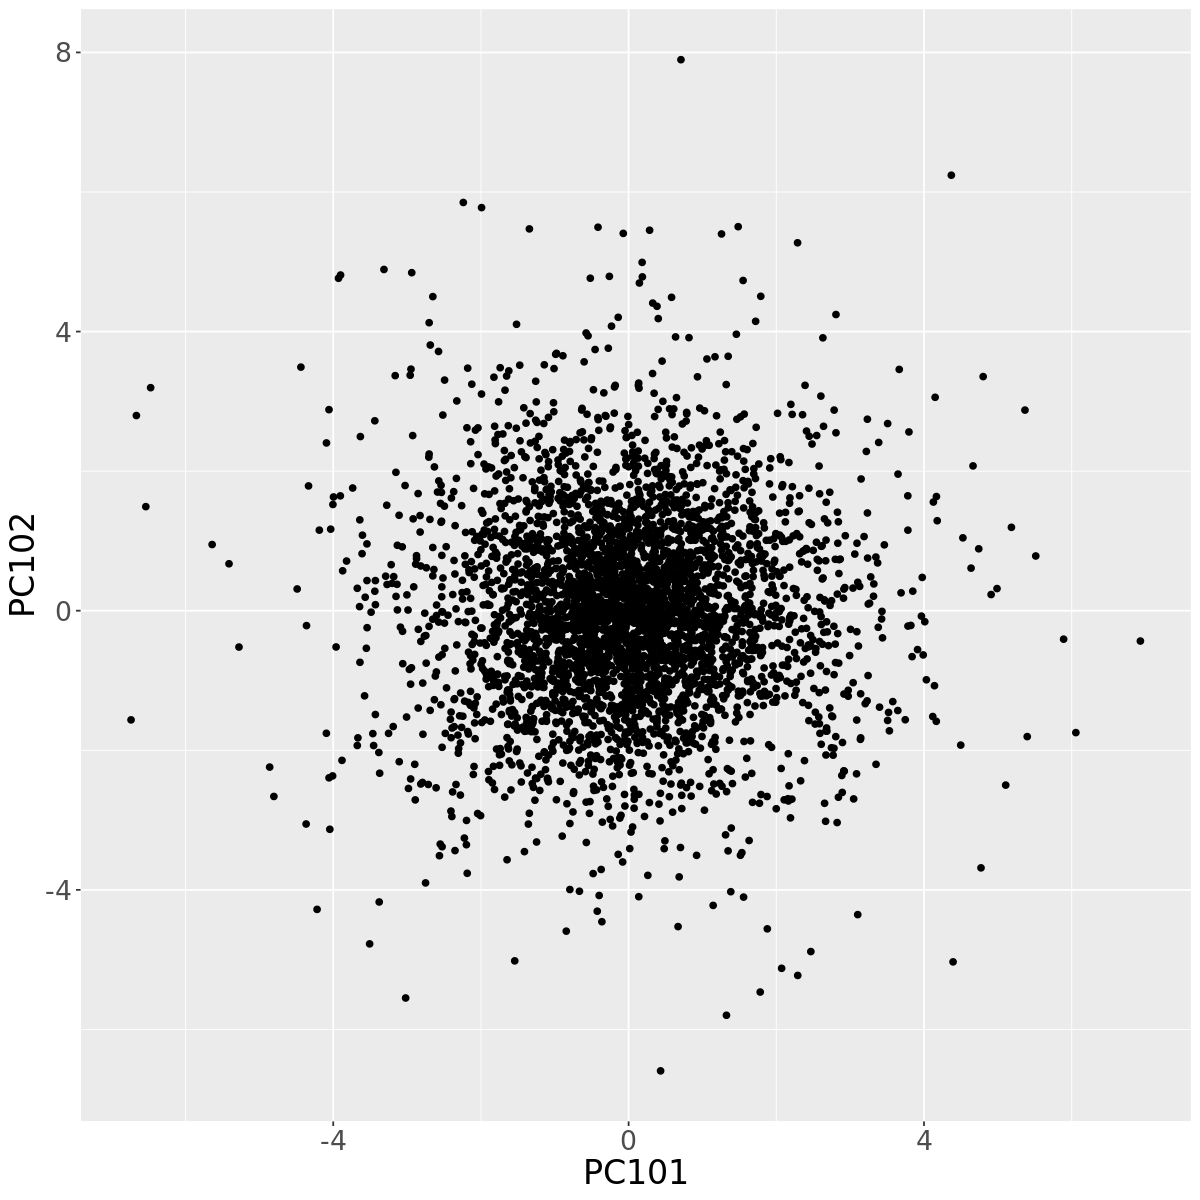

In [8]:
ggplot(as.data.frame(tishkoff.pca$x), aes(x=PC101, y=PC102)) +geom_point() + theme(text = element_text(size = 20))

* the ``ggplot()`` command creates the plot and sets PC101 and PC102 as its axes
* ``geom_point()`` actually draws the datapoints for the scatter plot
* ``theme()`` allows us to restyle the visual appearance.  In this case, we increased the fontsize to be big enough to read.

**QUESTION**: what shape does this scatterplot have?  Explain why you think it adopts this shape, in terms of the basic concept of what PCA does and how it works.

**ANSWER**: This scatterplot has a circular shape blob. It adopts this shape because there's no correlation between the two PCs! PC101 and PC102 don't capture a large amount of variance in the original data set, and the proportion of the variance they do capture and along with it, the standard deviation of each PC is quite similar to one another value-wise. In addition, the radius of the circle would be approximately be the average distance of the data points from the center.

Next, let's look at PC1 vs. PC2:

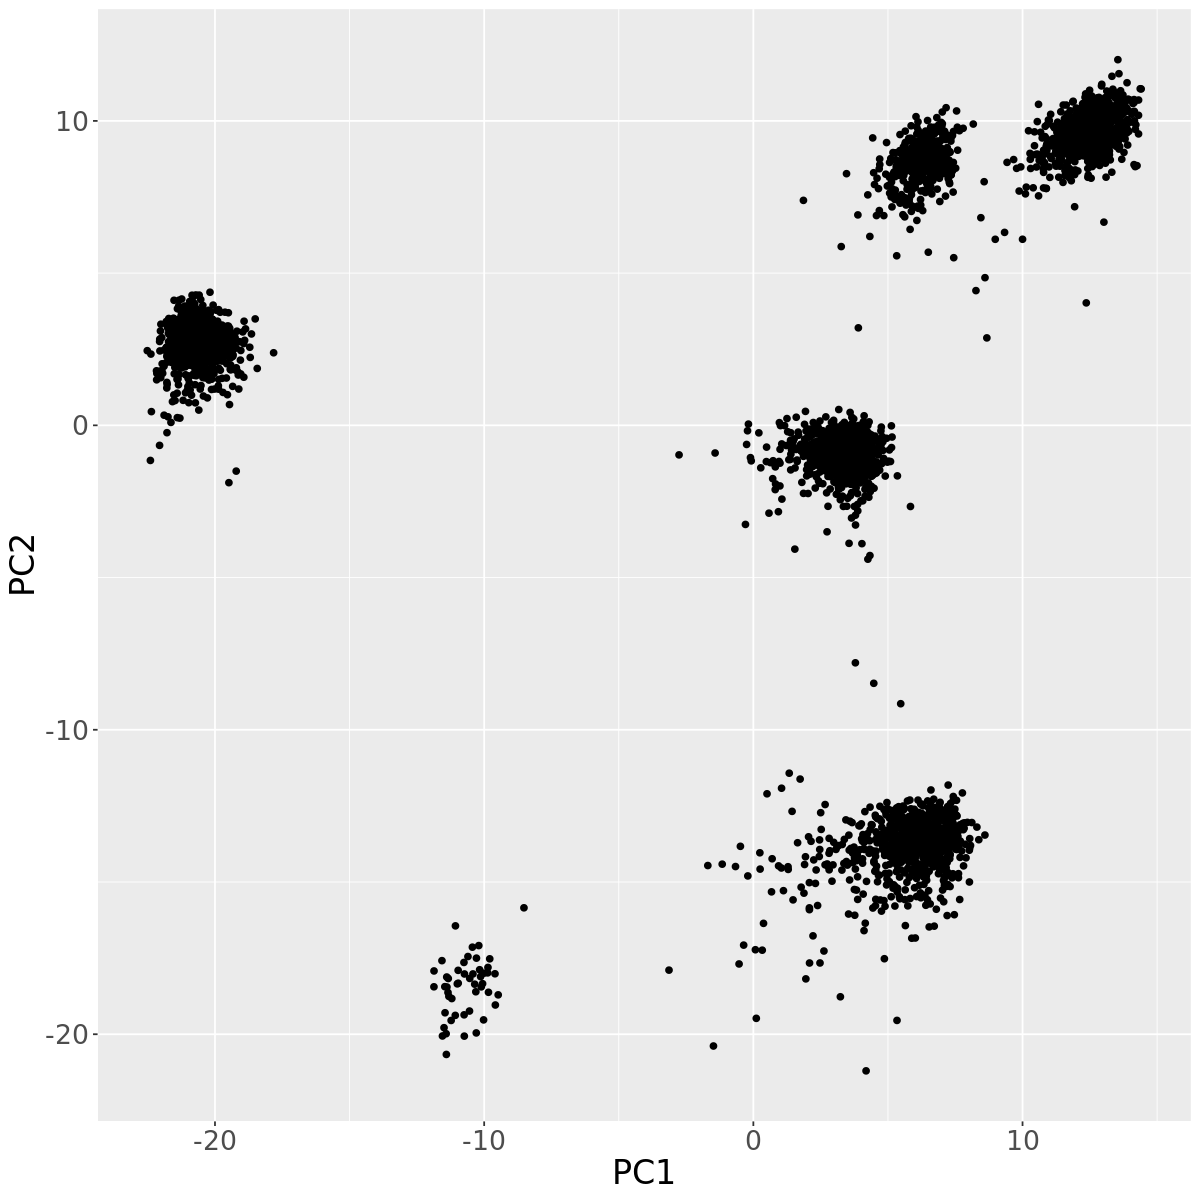

In [9]:
ggplot(as.data.frame(tishkoff.pca$x), aes(x=PC1, y=PC2)) +geom_point() + theme(text = element_text(size = 20))

**QUESTION**: how is the shape of this scatterplot different from the previous one?  Interpret what you think this means, in terms of what it's telling you about the original genotyping dataset.

**ANSWER**: This scatterplot is different from the previous one given that the circles are smaller and there are multiple ones. They are like in clusters! This might mean there are certain significant subgroups within the original genotyping dataset.

Filtering the Original Dataset
============================

As we saw above, these genotype data contain individuals from different human populations, e.g. the Hadza in Africa.  R's ``filter()`` function makes it easy to get the subset of data that belongs to a given population, e.g. the Hadza:

In [10]:
hadza<-filter(tishkoff, population.name=="Hadza")
hadza

Individual,population.code,population.name,GGAA23C07_1,GGAA23C07_2,MFD424.TTTA003_1,MFD424.TTTA003_2,GTTTT002P_1,GTTTT002P_2,GATA13C08M_1,⋯,SCA10_1,SCA10_2,TCTA015M_1,TCTA015M_2,AFMB337ZH9_1,AFMB337ZH9_2,MFD313_1,MFD313_2,mid0110_1,mid0110_2
<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,Hadza,309,301,288,288,145,145,198,⋯,206,196,210,206,0,0,0,0,0,0
4,1,Hadza,305,301,292,284,150,150,202,⋯,206,161,0,0,0,0,0,0,0,0
5,1,Hadza,309,297,264,264,150,145,202,⋯,206,196,210,210,0,0,0,0,0,0
7,1,Hadza,305,301,264,264,145,135,202,⋯,201,196,210,210,0,0,0,0,0,0
10,1,Hadza,309,305,264,264,0,0,202,⋯,201,196,210,210,0,0,0,0,0,0
12,1,Hadza,309,301,264,264,150,150,198,⋯,201,196,210,210,0,0,0,0,0,0
19,1,Hadza,313,297,288,264,155,150,202,⋯,201,191,214,210,0,0,0,0,0,0
20,1,Hadza,309,305,296,264,152,152,198,⋯,201,201,210,210,0,0,0,0,0,0
21,1,Hadza,305,301,0,0,150,145,202,⋯,196,171,214,210,0,0,0,0,0,0


Applying the Same PCA Transform to New Data
===========================================

Recall that a PCA consists of a "rotation matrix" that transforms the original coordinate system to its principal components.  R's ``predict()`` function makes it very easy to apply this rotation matrix to any input data you want.  For example, here let's get genotypes from the Hadza population and display them in red projected onto our PC1 vs. PC2 scatterplot:

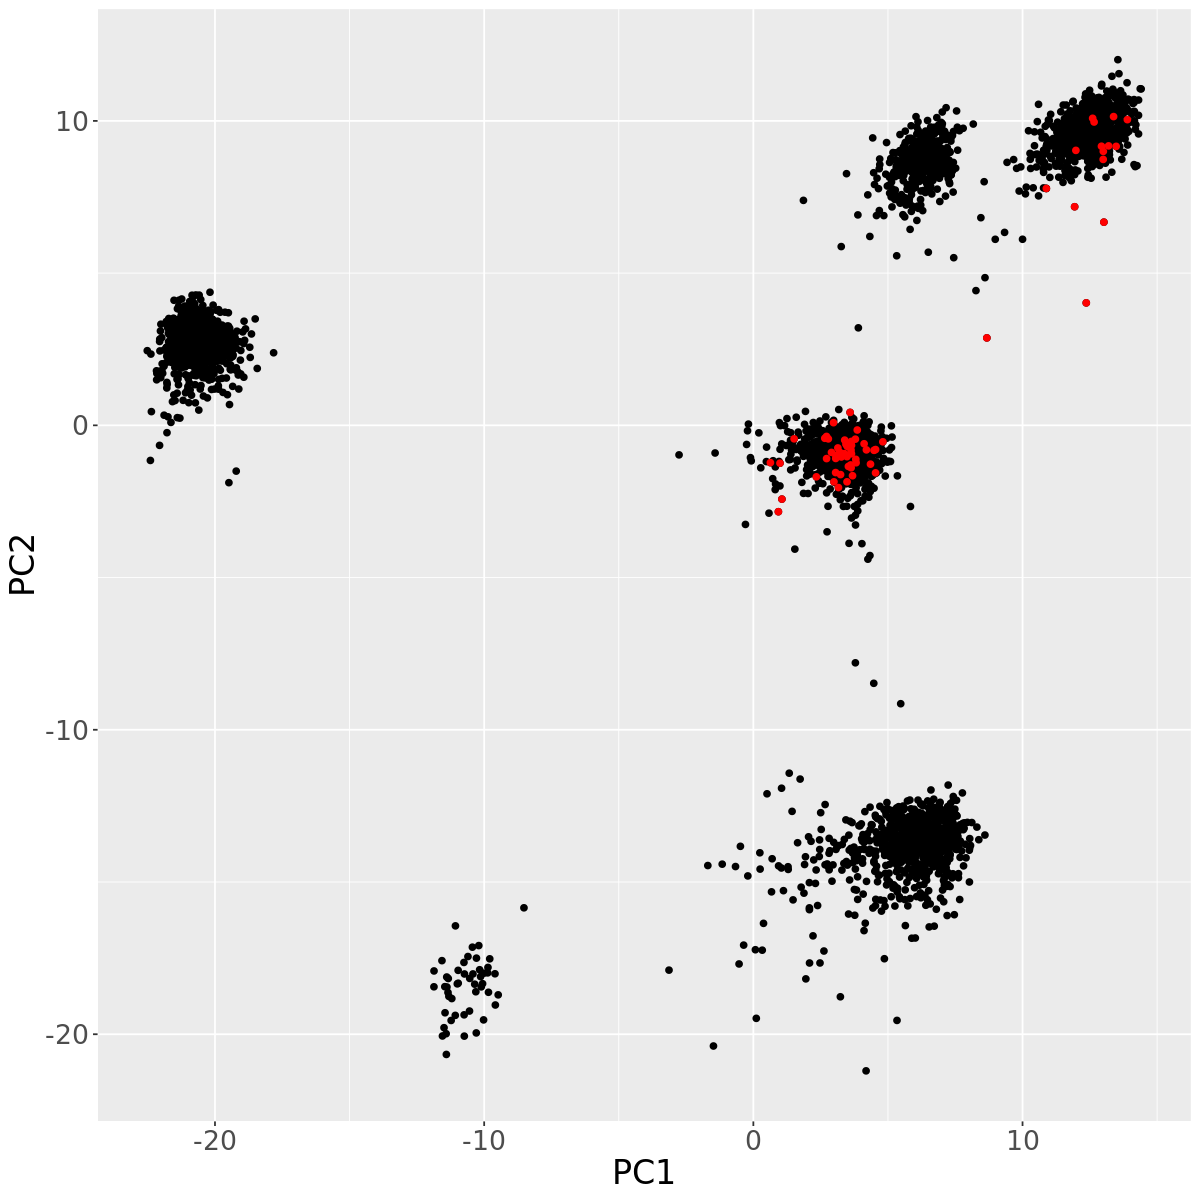

In [11]:
hadzaPC <- predict(tishkoff.pca, newdata=hadza[,4:1000])
ggplot(as.data.frame(tishkoff.pca$x), aes(x=PC1, y=PC2)) +geom_point() +
  geom_point(aes(x=PC1, y=PC2), data=as.data.frame(hadzaPC), color=2) + theme(text = element_text(size = 20))

We can do the same thing for other populations (Yoruba, Han, Tamil) and project in different colors onto our PC1 vs. PC2 scatterplot:

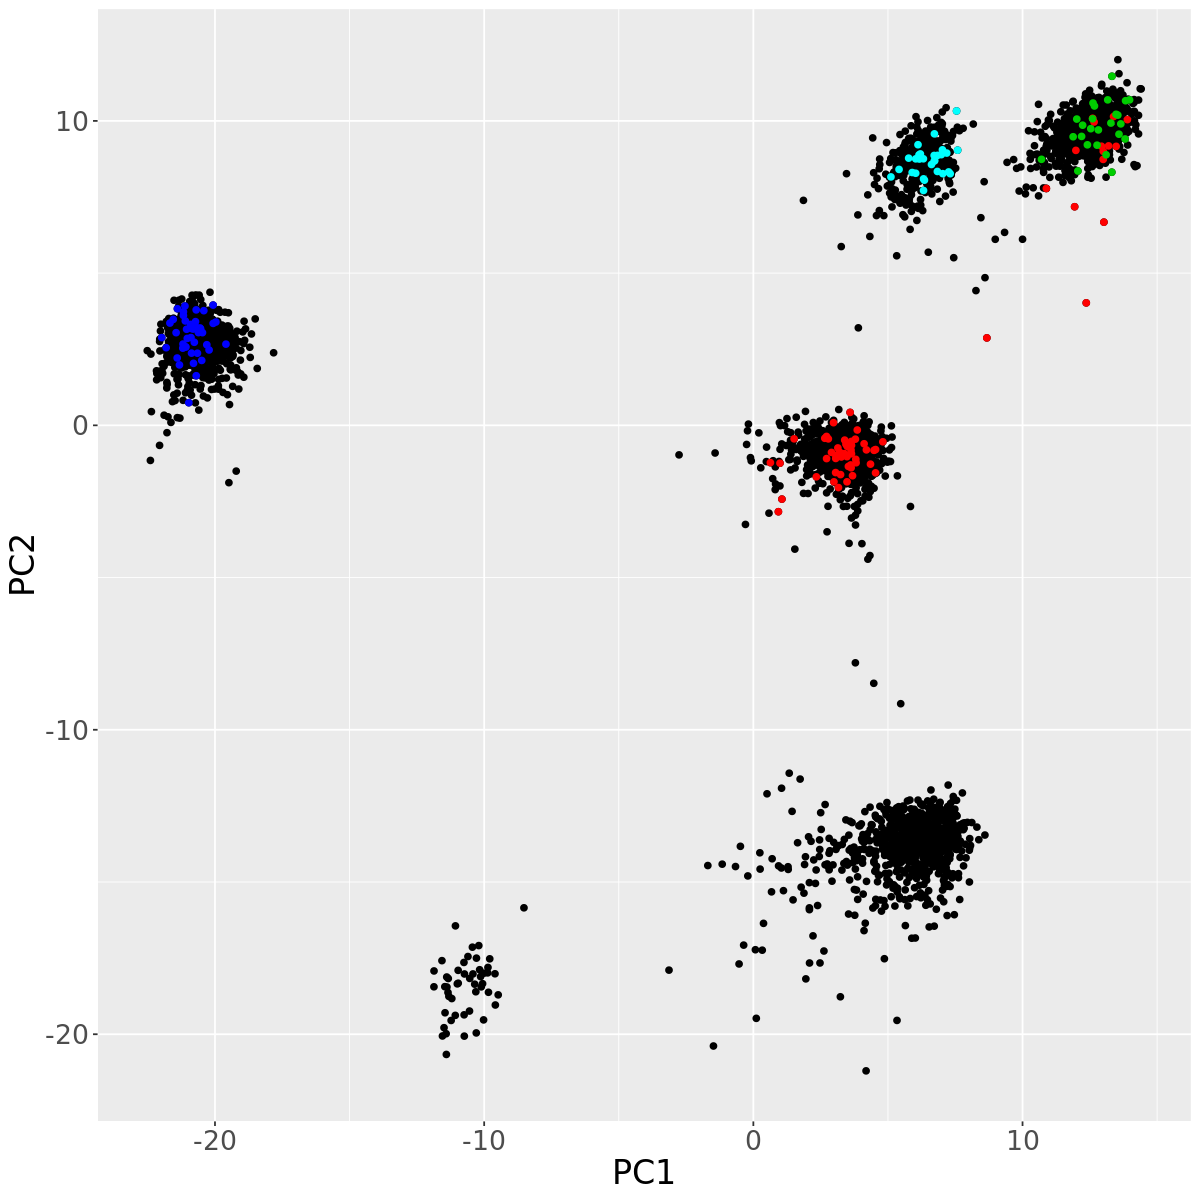

In [12]:
yoruba<-filter(tishkoff, population.name=="Yoruba")[,4:1000]
yorubaPC <- as.data.frame(predict(tishkoff.pca, newdata=yoruba))
han<-filter(tishkoff, population.name=="Han")[,4:1000]
hanPC <- as.data.frame(predict(tishkoff.pca, newdata=han))
tamil<-filter(tishkoff, population.name=="Tamil")[,4:1000]
tamilPC <- as.data.frame(predict(tishkoff.pca, newdata=tamil))
ggplot(as.data.frame(tishkoff.pca$x), aes(x=PC1, y=PC2)) +geom_point() +
  geom_point(aes(x=PC1, y=PC2), data=as.data.frame(hadzaPC), color=2) +
  geom_point(aes(x=PC1, y=PC2), data=yorubaPC, color=3) +
  geom_point(aes(x=PC1, y=PC2), data=hanPC, color=4) +
  geom_point(aes(x=PC1, y=PC2), data=tamilPC, color=5) + theme(text = element_text(size = 20))

**QUESTION**: interpret the meaning of this graph, in terms of what it tells you about what sources of variation PCA is actually capturing as its first two principal components.

**ANSWER**: A source of variation PCA is actually capturing as its first two PCs can be due to the differing populations/ancestry. Each population relatively lands in it's own little cluster.